# Diabetes

AIM -To predict whether a person suffer from diabetes or not.

Input :
    1)Pregnancies
    2)Glucose
    3)BloodPressure
    4)SkinThickness
    5)Insulin
    6)BMI
    7)DiabetesPedigreeFunction
    8)Age

Output(Class) :
    Outcome(0:Person do not suffer from diabetes, 1:Person suffer from diabetes)
    

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
# read the data using pandas dataframe
training_set = pd.read_csv('diabetes.csv')

In [3]:
training_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Show the data head!
training_set.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EXPLORE/VISUALIZE DATASET

In [6]:
disease   = training_set[training_set['Outcome']==1]
no_disease = training_set[training_set['Outcome']==0]


In [7]:
print("Total =", len(training_set))

print("Number of patients who suffers from disease =", len(disease))
print("Percentage of have disease =", 1.*len(disease)/len(training_set)*100.0, "%")
 
print("Number of patients who do not suffer from disease =", len(no_disease))
print("Percentage who do not suffer from disease =", 1.*len(no_disease)/len(training_set)*100.0, "%")
 
        

Total = 768
Number of patients who suffers from disease = 268
Percentage of have disease = 34.89583333333333 %
Number of patients who do not suffer from disease = 500
Percentage who do not suffer from disease = 65.10416666666666 %


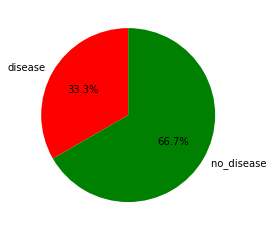

In [8]:
slices_hours = [4, 8]
activities = ['disease', 'no_disease ']
colors = ['r', 'g']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

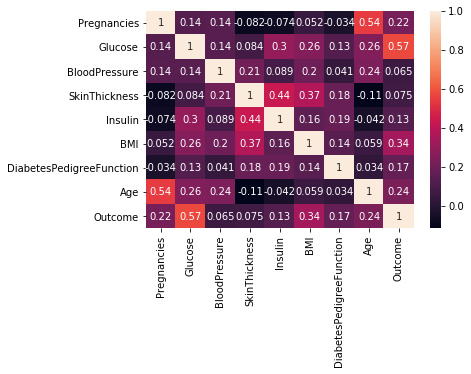

In [9]:
#check for correlation
a=training_set.corr()
sns.heatmap(a,annot=True)

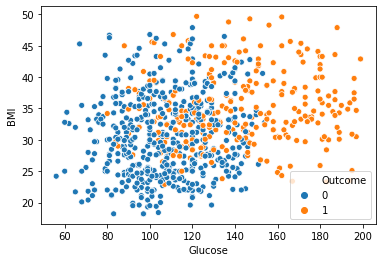

In [10]:
sns.scatterplot(training_set['Glucose'], training_set['BMI'], hue = training_set['Outcome'])

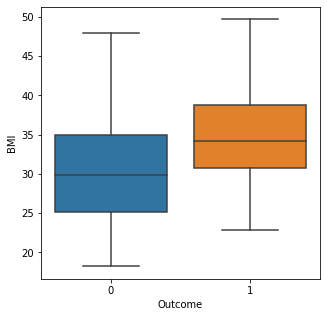

In [11]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Outcome', y='BMI',data=training_set)

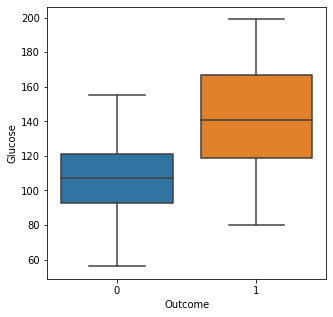

In [12]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Outcome', y='Glucose',data=training_set)

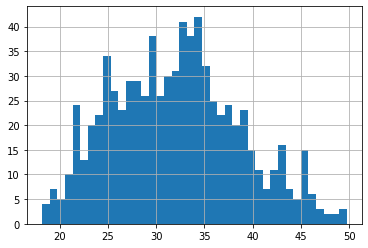

In [13]:
training_set['BMI'].hist(bins = 40)

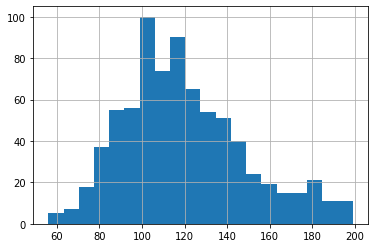

In [14]:
training_set['Glucose'].hist(bins = 20)

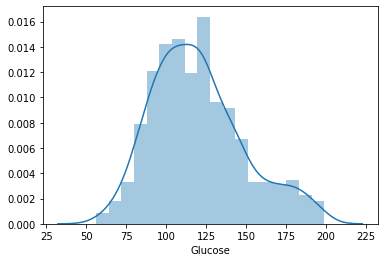

In [15]:
sns.distplot(training_set['Glucose'])

# Step 2: Data Preprocessing

In [16]:
#check for null values
training_set.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
#Let's drop the unwanted attributes
training_set.drop(['Pregnancies', 'BloodPressure','SkinThickness','Age','Insulin','DiabetesPedigreeFunction'],axis=1,inplace=True)

In [18]:
training_set

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1
...,...,...,...
763,101,32.9,0
764,122,36.8,0
765,121,26.2,0
766,126,30.1,1


In [19]:
# Check For Outliers
Q1=training_set.quantile(0.25)
Q3=training_set.quantile(0.75)
IQR = Q3 - Q1
((training_set < (Q1 - 3*IQR)) | (training_set > (Q3 + 3* IQR))).sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

# Regression

In [20]:
X = training_set.drop(['Outcome','Glucose'],axis=1).values
y = training_set['Glucose'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [22]:
X_train

array([[35.2],
       [28.2],
       [22. ],
       [25.2],
       [30. ],
       [45. ],
       [25.5],
       [23.5],
       [20.4],
       [29.8],
       [35.1],
       [32.4],
       [32.8],
       [26.2],
       [31.6],
       [29.6],
       [27.8],
       [35.3],
       [29.6],
       [39.5],
       [32.4],
       [33.1],
       [36.8],
       [35.8],
       [28.4],
       [29.2],
       [30.8],
       [42.3],
       [36.8],
       [42. ],
       [31.2],
       [25. ],
       [43.2],
       [27.6],
       [31.6],
       [25.4],
       [21.1],
       [27.6],
       [22.5],
       [33.3],
       [32.4],
       [39.2],
       [37.9],
       [32.8],
       [25.1],
       [35.4],
       [24. ],
       [22.1],
       [24. ],
       [29.9],
       [33.6],
       [33.3],
       [37.7],
       [38.6],
       [26.6],
       [21.8],
       [37.4],
       [29.9],
       [23.6],
       [26.1],
       [34.1],
       [46.7],
       [27.1],
       [34.3],
       [21.9],
       [37.3],
       [32

In [23]:
y_train

array([150,  97, 120, 109, 120, 135, 161, 194,  71, 122, 120, 119,  76,
       111, 125, 105,  89,  74, 107, 102, 130,  91,  95,  77, 110,  91,
       102, 158,  83, 180, 136,  60, 131, 124, 144, 109, 128,  88,  89,
       118,  91, 140, 145, 154, 102,  99, 111, 139, 103, 136, 113,  77,
        95,  99, 155, 124,  95,  88, 112, 151, 112,  81, 119, 131, 120,
        96,  95, 101, 128, 134, 147, 140, 104, 109,  95, 106, 122, 151,
        83, 122, 146, 123, 104, 152, 100, 170,  88, 132, 113, 109,  92,
       100,  90, 139, 102, 120, 107, 145,  90, 128, 105, 163, 126, 100,
        95, 117,  91,  93,  97, 122, 111,  56, 100, 184, 115,  90, 114,
        68,  85, 119, 136, 125,  80, 121, 137,  75,  85, 169, 123, 111,
       100, 111,  80,  84,  85, 145, 170, 122,  79, 143, 102, 197, 196,
        83,  92, 120, 106, 162, 107, 101, 130, 148, 146, 134, 130,  80,
       144,  84,  92, 142, 114, 125,  83, 140, 120, 125, 122, 126,  74,
        88, 100, 120, 143, 112, 100, 147, 189, 138, 140, 139,  8

# 1) Linear Regression

In [24]:
y_train

array([150,  97, 120, 109, 120, 135, 161, 194,  71, 122, 120, 119,  76,
       111, 125, 105,  89,  74, 107, 102, 130,  91,  95,  77, 110,  91,
       102, 158,  83, 180, 136,  60, 131, 124, 144, 109, 128,  88,  89,
       118,  91, 140, 145, 154, 102,  99, 111, 139, 103, 136, 113,  77,
        95,  99, 155, 124,  95,  88, 112, 151, 112,  81, 119, 131, 120,
        96,  95, 101, 128, 134, 147, 140, 104, 109,  95, 106, 122, 151,
        83, 122, 146, 123, 104, 152, 100, 170,  88, 132, 113, 109,  92,
       100,  90, 139, 102, 120, 107, 145,  90, 128, 105, 163, 126, 100,
        95, 117,  91,  93,  97, 122, 111,  56, 100, 184, 115,  90, 114,
        68,  85, 119, 136, 125,  80, 121, 137,  75,  85, 169, 123, 111,
       100, 111,  80,  84,  85, 145, 170, 122,  79, 143, 102, 197, 196,
        83,  92, 120, 106, 162, 107, 101, 130, 148, 146, 134, 130,  80,
       144,  84,  92, 142, 114, 125,  83, 140, 120, 125, 122, 126,  74,
        88, 100, 120, 143, 112, 100, 147, 189, 138, 140, 139,  8

In [25]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Predicting the Test set results
y_pred = linear_regressor.predict(X_test)

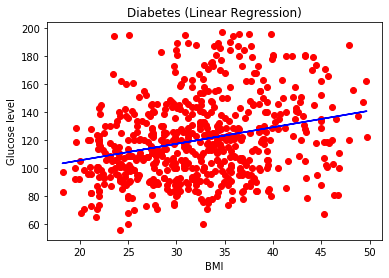

In [27]:
# Visualising the Linear Regression results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linear_regressor.predict(X_train), color = 'blue')
plt.title('Diabetes (Linear Regression)')
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.show()

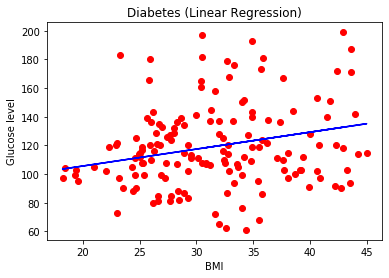

In [28]:
# Visualising the Linear Regression results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, linear_regressor.predict(X_test), color = 'blue')
plt.title('Diabetes (Linear Regression)')
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.show()

In [29]:
print('Coefficients: \n', linear_regressor.coef_)
print('Intercept: \n', linear_regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [1.1813283]
Intercept: 
 81.99154750808367


In [30]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 809.1412132145497


In [31]:
print("r2 score:",r2_score(y_test, y_pred))

r2 score: 0.029535516309623144


In [32]:
import statsmodels.api as sm
x = sm.add_constant(X)
results = sm.OLS(endog = y, exog=x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     53.83
Date:                Wed, 06 May 2020   Prob (F-statistic):           5.57e-13
Time:                        16:14:35   Log-Likelihood:                -3644.1
No. Observations:                 768   AIC:                             7292.
Df Residuals:                     766   BIC:                             7301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.9421      4.991     16.820      0.000      74.145      93.739
x1             1.1204      0.153      7.337      0.000       0.821       1.420
==============================================================================
Omnibus:                       31.307   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.372
Skew:                           0.518   Prob(JB):                     3.44e-08
Kurtosis:                       3.037   Cond. No.                         162.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2) Polynomial Regression

In [33]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree =3) #try 2,3 and 4
X_pol = polynomial_regressor.fit_transform(X)
l_r = LinearRegression()
l_r.fit(X_pol, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

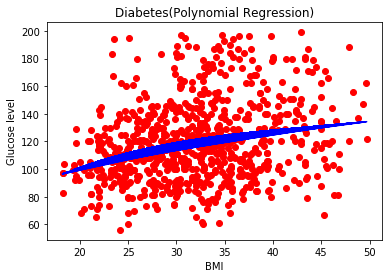

In [35]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, l_r.predict(X_pol), color = 'blue')
plt.title('Diabetes(Polynomial Regression)')
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.show()

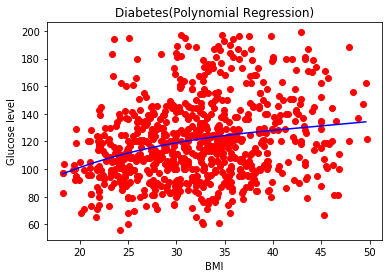

In [36]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, l_r.predict(polynomial_regressor.fit_transform(X_grid)), color = 'blue')
plt.title('Diabetes(Polynomial Regression)')
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.show()

In [37]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y,l_r.predict(X_pol)) )  
print("r2 score: {}".format(r2_score(y,l_r.predict(X_pol))))

Mean Squared Error: 771.0598722058867
r2 score: 0.06958978728985787


# Logistic Regression

In [38]:
#Let's drop the Outcome coloumn before we do train test split
X = training_set.drop('Outcome',axis=1).values
y = training_set['Outcome'].values


In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=0)

In [41]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [43]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [44]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

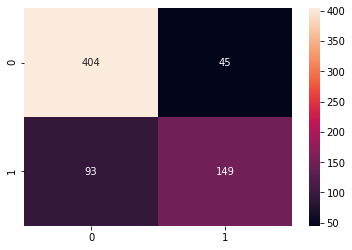

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

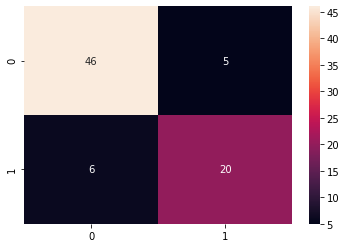

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.80      0.77      0.78        26

    accuracy                           0.86        77
   macro avg       0.84      0.84      0.84        77
weighted avg       0.86      0.86      0.86        77



In [48]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_predict_test)
acc=acc*100
print("Accuracy of Model is :",acc,"%")

Accuracy of Model is : 85.71428571428571 %


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


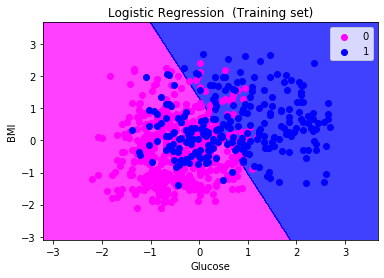

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Logistic Regression  (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


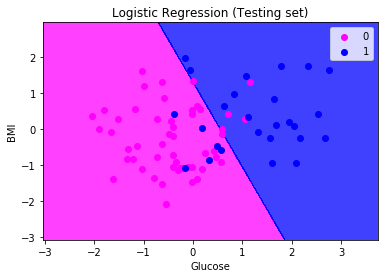

In [50]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

Logistic Regression is best regression model for our dataset

# Classification

# 1) Naive Bayes Method

In [51]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
# Predicting the Test set results
y_predict_test = classifier.predict(X_test)

In [53]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=0)

C:\Users\Nikhil Garg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [54]:
###LOG LOSS
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=0)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(classifier, X, y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())

[-0.60095764 -0.4166555  -0.47520386 -0.4641535  -0.36933316 -0.42168749
 -0.35248822 -0.31280894 -0.44733402 -0.45793898]
-0.43185613076449914
0.07559922461563405


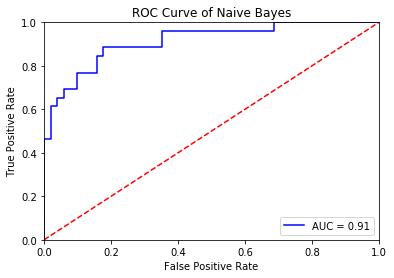

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_scores = classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

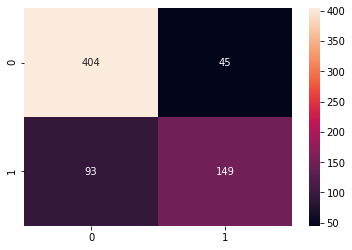

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

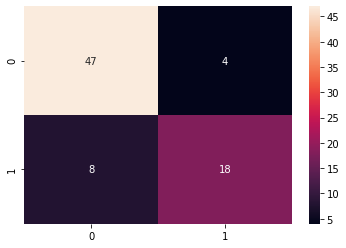

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89        51
           1       0.82      0.69      0.75        26

    accuracy                           0.84        77
   macro avg       0.84      0.81      0.82        77
weighted avg       0.84      0.84      0.84        77



In [59]:
acc=metrics.accuracy_score(y_test, y_predict_test)
acc=acc*100
print("Accuracy of Model is :",acc,"%")

Accuracy of Model is : 84.4155844155844 %


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


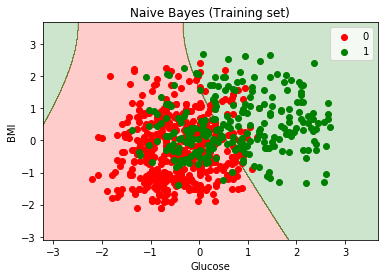

In [60]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


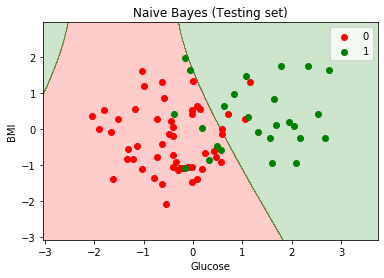

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Testing set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

# 2) Decision Tree Method

In [62]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
# Predicting the Test set results
y_predict_test = classifier.predict(X_test)

In [64]:
###LOG LOSS
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=0)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(classifier, X, y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())

[-10.77445943 -12.5687335   -8.5406525   -9.41975975  -8.97118344
 -10.31690198  -7.62557914  -8.97122498 -10.90710827 -10.90711879]
-9.900272177105744
1.3807950413040617


C:\Users\Nikhil Garg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


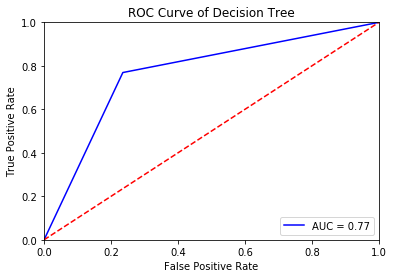

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_scores = classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

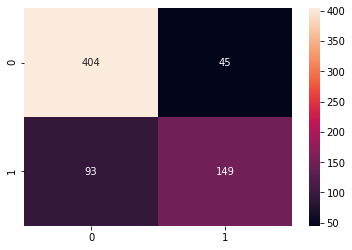

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

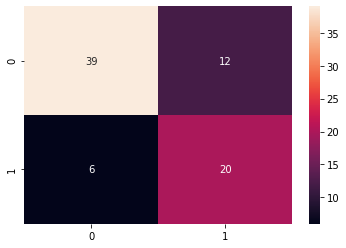

In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        51
           1       0.62      0.77      0.69        26

    accuracy                           0.77        77
   macro avg       0.75      0.77      0.75        77
weighted avg       0.79      0.77      0.77        77



In [69]:
acc=metrics.accuracy_score(y_test, y_predict_test)
acc=acc*100
print("Accuracy of Model is :",acc,"%")

Accuracy of Model is : 76.62337662337663 %


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


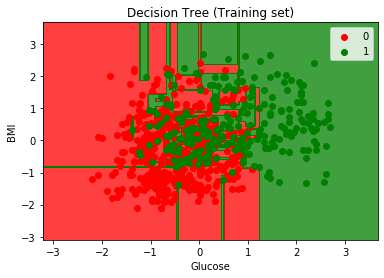

In [70]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


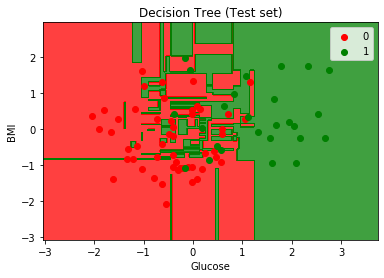

In [71]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

# 3) KNN Method

In [72]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6,leaf_size=1,p=1)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='uniform')

In [73]:
# Predicting the Test set results
y_predict_test = classifier.predict(X_test)

In [74]:
###LOG LOSS
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=0)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(classifier, X, y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())

[-1.33065481 -1.30069029 -0.86976975 -3.47335116 -0.83160178 -2.09692802
 -0.78631964 -0.81071038 -1.32035221 -1.35258768]
-1.417296571239934
0.7831252357061822


C:\Users\Nikhil Garg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


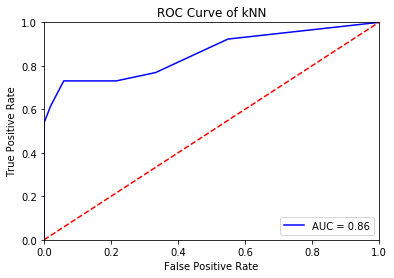

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_scores = classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [76]:
from sklearn.metrics import roc_auc_score
print("AUC Score is",roc_auc)

AUC Score is 0.856711915535445


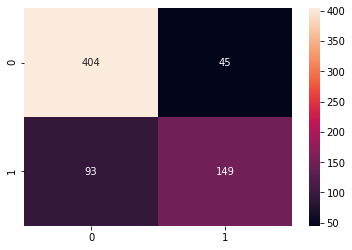

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

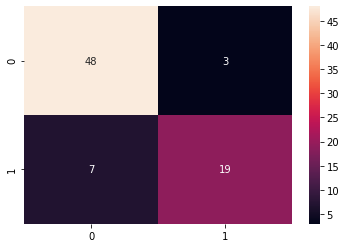

In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



In [80]:
acc=metrics.accuracy_score(y_test, y_predict_test)
acc=acc*100
print("Accuracy of Model is :",acc,"%")

Accuracy of Model is : 87.01298701298701 %


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


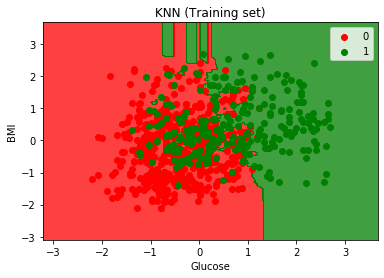

In [81]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


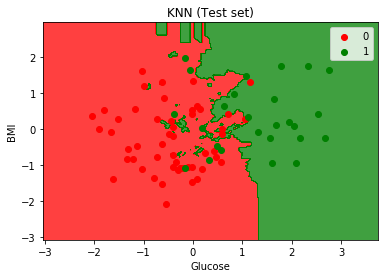

In [82]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

# SVM

In [83]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

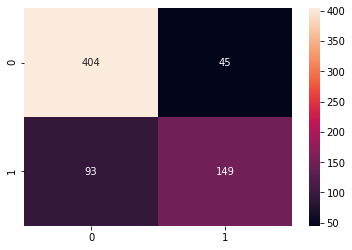

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

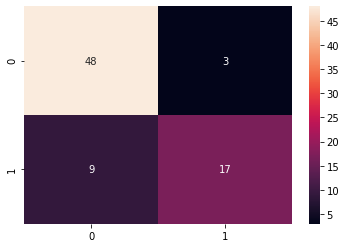

In [84]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [85]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model is :",accuracy_score(y_test,y_pred)*100,'%')

Accuracy of the model is : 84.4155844155844 %


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


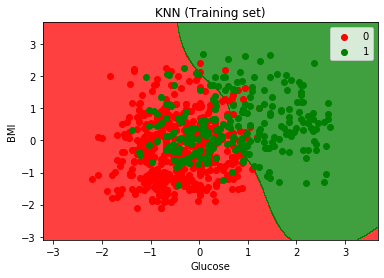

In [87]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


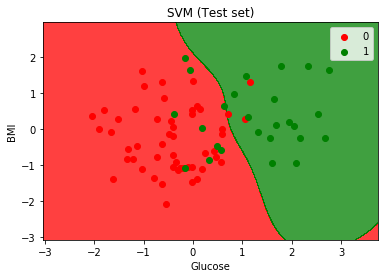

In [88]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

KNN Classification is best Classfication model for our dataset